In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ejercicio 1

In [2]:
datos_entrenamiento_csv = pd.read_csv('mnist_train.csv', header=None)
datos_entrenamiento = datos_entrenamiento_csv.values.tolist()

datos_testeo_csv = pd.read_csv('mnist_test.csv', header=None)
datos_testeo = datos_testeo_csv.values.tolist()


#### Inciso A

In [3]:
def vector_a_matriz(vector): # matriz 28x28
    matriz = []
    fila = []

    for i in range(0, 28):
        for j in range(0, 28):
            fila.append(int(vector[i*28+j]))
        matriz.append(fila)
        fila = []
        
    return np.array(matriz)


def remover_indice_vector(vector):
    indice_del_vector = vector[0] 
    # Guardar matriz vectorizada sin el indice (primer elemento)
    vector_sin_indice = vector[1:]

    return indice_del_vector, vector_sin_indice

def grafico_matriz(matriz, indice):
    plt.imshow(matriz, cmap='gray')
    plt.title(indice)
    plt.show()


def graficar_imagen(datos, fila):
    # Guardar la matriz vectorizada
    vector = datos[fila]
    
    indice_del_vector, vector_sin_indice = remover_indice_vector(vector)
    
    matriz = vector_a_matriz(vector_sin_indice)

    grafico_matriz(matriz, indice_del_vector)



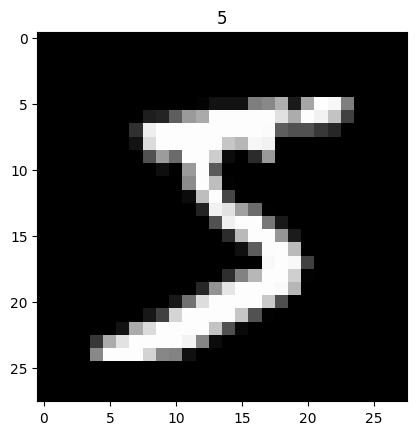

In [4]:
graficar_imagen(datos_entrenamiento, 0)

#### Inciso B

In [5]:
def cantidad_indices(datos, cantidad):
    indices = []
    suma = 0
    
    for i in range(0, cantidad):
        indices.append(int(datos[i][0]))
    
    for j in range(0, 10):
        print("Hay", indices.count(j), "imagenes del digito", j)
        suma = suma + indices.count(j)

    

In [6]:
cantidad_indices(datos_entrenamiento, len(datos_entrenamiento))

Hay 5923 imagenes del digito 0
Hay 6742 imagenes del digito 1
Hay 5958 imagenes del digito 2
Hay 6131 imagenes del digito 3
Hay 5842 imagenes del digito 4
Hay 5421 imagenes del digito 5
Hay 5918 imagenes del digito 6
Hay 6265 imagenes del digito 7
Hay 5851 imagenes del digito 8
Hay 5949 imagenes del digito 9


In [7]:
cantidad_indices(datos_testeo, len(datos_testeo))

Hay 980 imagenes del digito 0
Hay 1135 imagenes del digito 1
Hay 1032 imagenes del digito 2
Hay 1010 imagenes del digito 3
Hay 982 imagenes del digito 4
Hay 892 imagenes del digito 5
Hay 958 imagenes del digito 6
Hay 1028 imagenes del digito 7
Hay 974 imagenes del digito 8
Hay 1009 imagenes del digito 9


#### Inciso C

In [8]:
# def promedio_2000_imagenes(datos):
#     suma = np.zeros((28,28))

#     for i in range(0, 2000):
#        _, vector_sin_indice = remover_indice_vector(datos[i])
#        suma = suma + vector_a_matriz(vector_sin_indice)

#     promedio = suma / 2000

#     return promedio

def imagen_promedio_de_digito(datos, cantidad_imagenes, digito):
   
   imagen_promedio = np.zeros((28,28))

   cantidad_imagenes_contadas = 0

   for i in range(0, cantidad_imagenes):
      if datos[i][0] == digito:
         _ , vector_sin_indice = remover_indice_vector(datos[i])
         imagen_promedio = imagen_promedio + vector_a_matriz(vector_sin_indice)
         cantidad_imagenes_contadas += 1
   
   imagen_promedio = imagen_promedio / cantidad_imagenes_contadas
   
   return imagen_promedio

def imagenes_promedio_de_digitos(datos, cantidad_imagenes):

   imagenes_promedio = []

   for i in range(0, 10):
      imagenes_promedio.append( imagen_promedio_de_digito(datos, cantidad_imagenes, i) )

   return imagenes_promedio
   


#### Inciso D

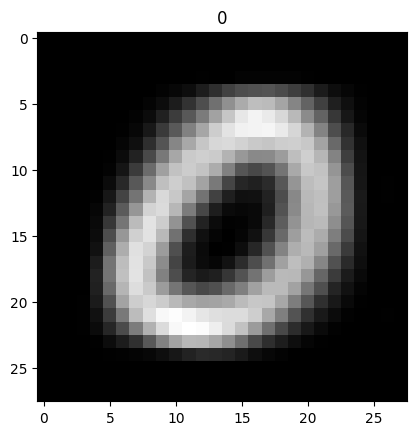

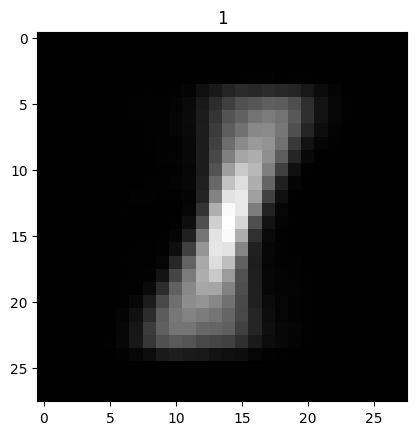

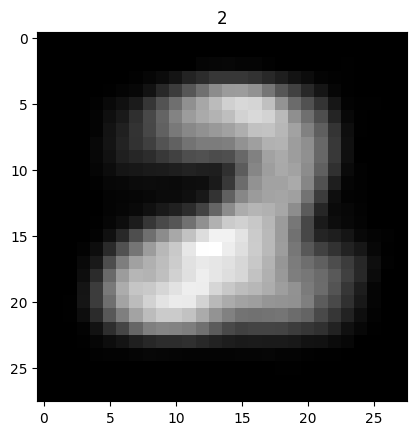

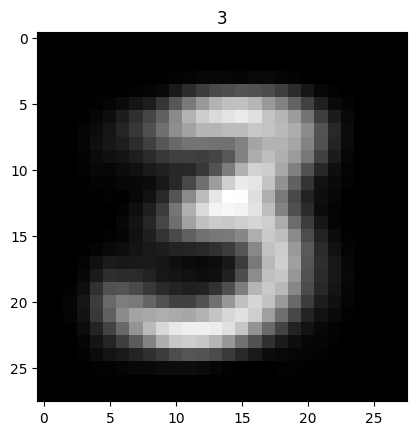

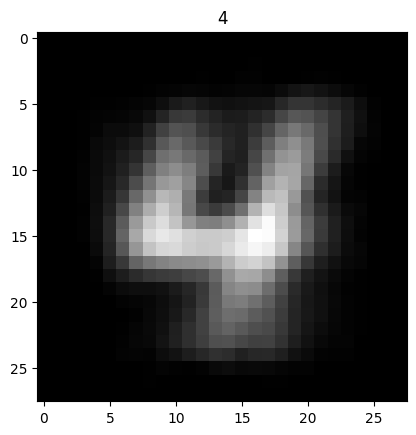

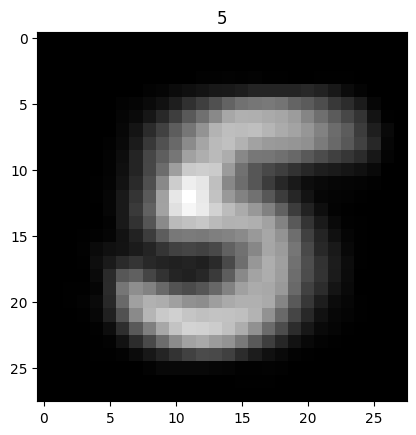

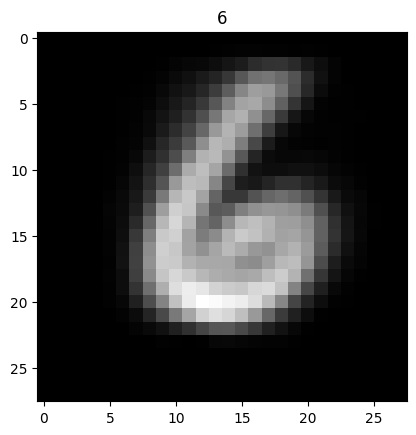

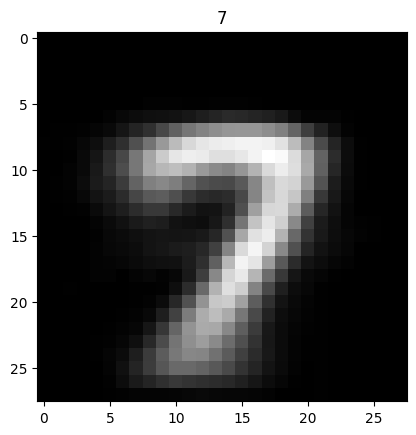

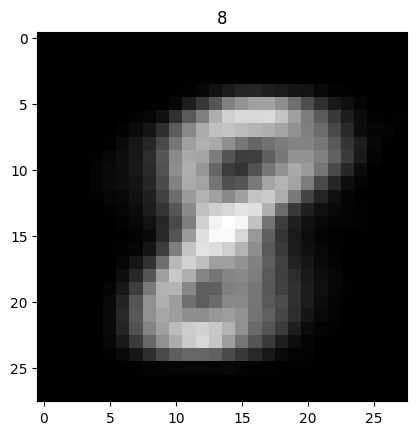

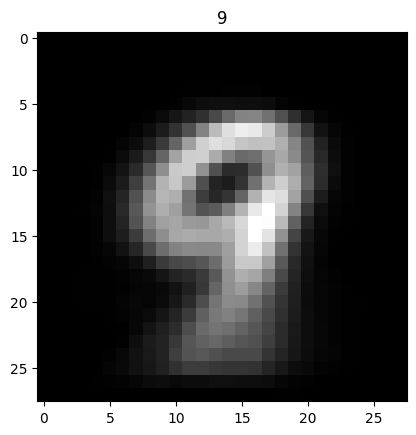

In [9]:
imagenes_promedio = imagenes_promedio_de_digitos(datos_entrenamiento, 2000)

for i in range(0, 10):
    grafico_matriz(imagenes_promedio[i], i)

### Ejercicio 2

#### Inciso A

In [10]:
#Agarramos una cantidad de filas de 
def filas_a_imagenes(datos, cantidad):
    
    imagenes = []
    indices = []

    for i in range(0, cantidad):
        indice_del_vector, vector_sin_indice = remover_indice_vector( datos[i] )
        matriz = vector_a_matriz( vector_sin_indice )
        imagenes.append( matriz )
        indices.append( indice_del_vector )

    return imagenes, indices


In [11]:
imagenes_de_testeo, indices_imagenes_de_testeo = filas_a_imagenes(datos_testeo, 200)

In [12]:
def predicciones(imagenes_promedio, imagenes_de_testeo):

    distancias = []
    distancia = 0
    predicciones = [] 

    for i in range(0, len(imagenes_de_testeo)):
        for j in range(0, 10): 
            distancia = np.linalg.norm( imagenes_promedio[j] - imagenes_de_testeo[i] )
            distancias.append( distancia )
        
        prediccion = distancias.index( min(distancias) )
        predicciones.append( prediccion )
        distancias.clear()

    return predicciones

In [13]:
predicciones = predicciones(imagenes_promedio, imagenes_de_testeo)

def precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones):

    precision = 0

    desaciertos = []
    
    for i in range(0,200):
        if indices_imagenes_de_testeo[i] == predicciones[i]:
            precision += 1
        else: 
            
            desaciertos.append( (imagenes_de_testeo[i], indices_imagenes_de_testeo[i] , predicciones[i]) )


    precision = precision / len(predicciones)

    return desaciertos, precision


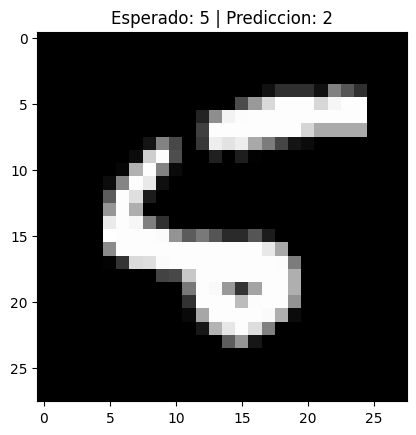

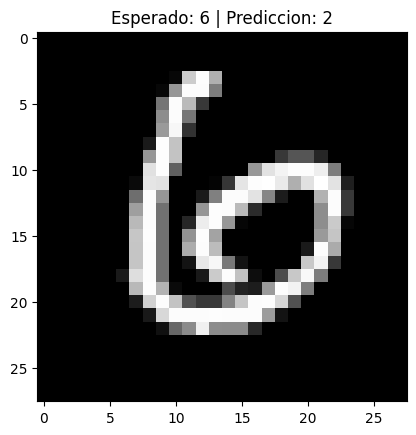

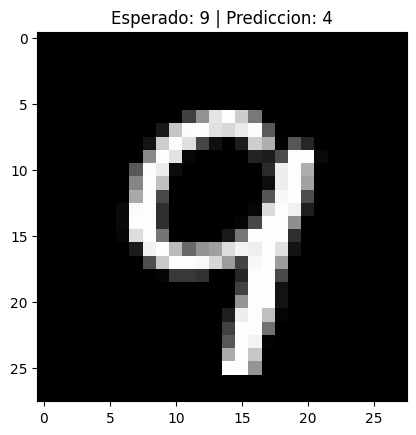

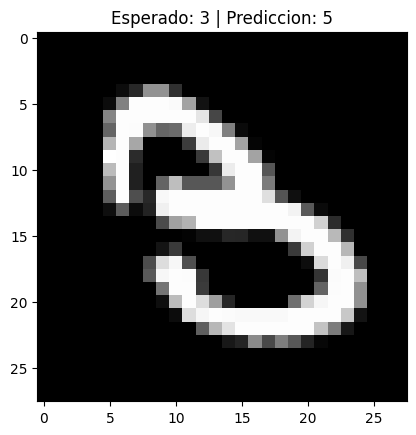

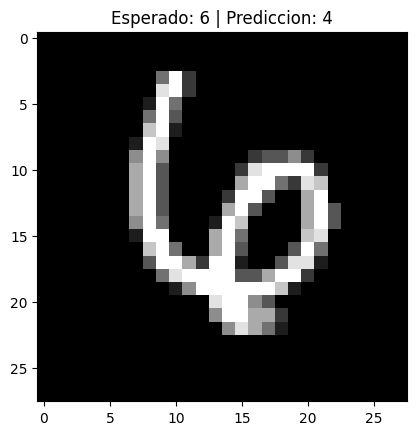

In [14]:
desaciertos, precision = precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones)
for i in range(0, 5):
    indice = desaciertos[i][1]
    prediccion = desaciertos[i][2]
    plt.title("Esperado: {} | Prediccion: {}".format(indice, prediccion))
    plt.imshow(desaciertos[i][0], cmap='gray')
    plt.show()
    

¿Considera buena la precision?

Consideramos que la precision es buena para solo considerar la distancia euclidea entre las imagenes, puesto que para la mayoria de los casos acerto (77%) y en los casos que desacertó alguno de los digitos transcriptos no se reconocen con facilidad y otros son muy parecidos a otros numeros.


### Ejercicio 3

In [15]:
e = 10**(-15)

def metodo_potencia_SVD(matriz):

    m, n = np.shape(matriz)

    A = matriz
    B = np.transpose(A) @ A

    x = np.random.rand(n, 1)
    norma_x = np.linalg.norm(x)
    x = x / norma_x

    Bx = B @ x
    norma_Bx = np.linalg.norm(Bx)
    x_k = Bx/norma_Bx

    while (np.transpose(x_k) @ x) < (1 - e):

        x = x_k
        Bx = B @ x
        norma_Bx = np.linalg.norm(Bx)
        x_k = Bx/norma_Bx

    v = x_k
    sigma = np.linalg.norm(A@v)
    u = (A@v) / sigma

    return sigma, v, u

def descomposicion_SVD(matriz):

    m, n = np.shape(matriz)

    A = matriz
    U_t = []
    Z = np.zeros((m,n))
    V_t = []

    for i in range(0, m):

        sigma, v, u = metodo_potencia_SVD(A)

        if i < n:
            Z[i][i] = sigma
            V_t.append(np.transpose(v)[0])
        
        U_t.append(np.transpose(u)[0])

        A = A - ( sigma * ( u@np.transpose(v) ) )

    U = np.transpose(np.array(U_t))
    V = np.transpose(np.array(V_t))

    return U, Z, V

In [16]:
_, vector_A = remover_indice_vector(datos_entrenamiento[0])
A = vector_a_matriz(vector_A)

U, Z, V = descomposicion_SVD(A)

A_SVD = U@Z@np.transpose(V) 

np.linalg.norm(A - A_SVD) 

5.539954652011077e-13

### Ejercicio 4

#### Inciso A

In [17]:
M = []

for i in range(10):
    M_i = []
    for j in range(2000):
        indice_vector_i, vector = remover_indice_vector(datos_entrenamiento[j]) 
        if indice_vector_i == i:
            M_i.append(vector)
    M_i = np.transpose(np.array(M_i))
    M.append( M_i )

#### Inciso B

In [18]:
def descomposicion_de_M(M):
    U = []
    Σ = []
    V = []
    for i in range(10):
        U_i, Σ_i, V_i = descomposicion_SVD(M[i])
        U.append(U_i)
        Σ.append(Σ_i)
        V.append(V_i)
    return U, Σ, V  

In [19]:
U, Σ, V = descomposicion_de_M(M)

#### Inciso C, D

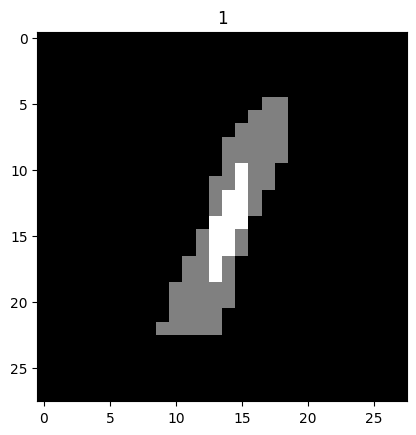

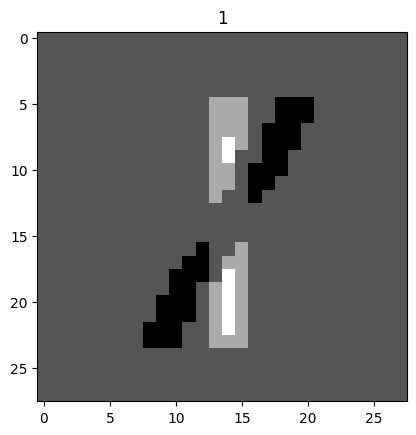

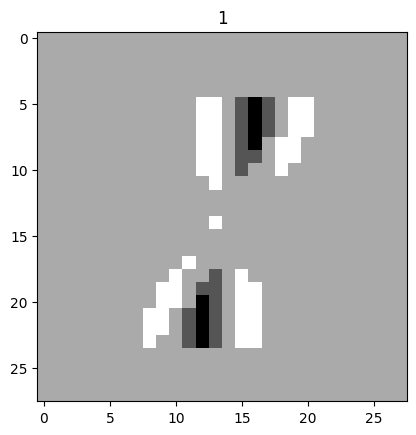

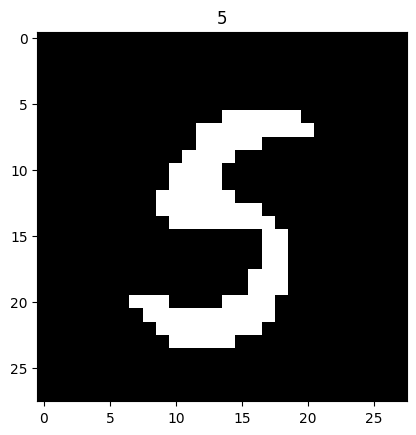

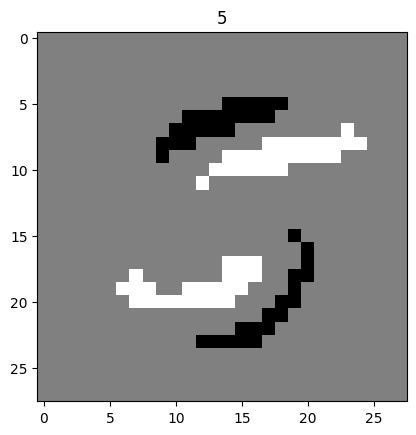

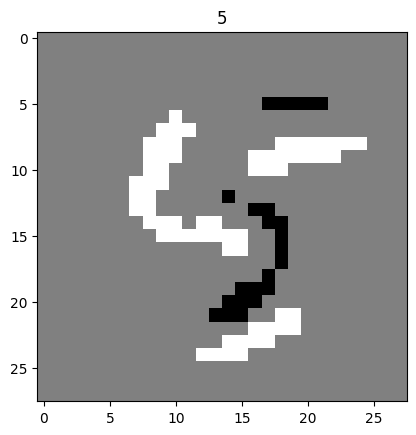

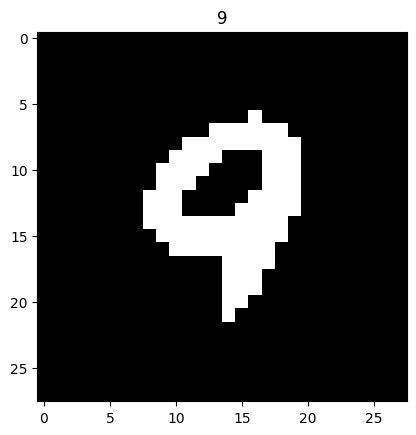

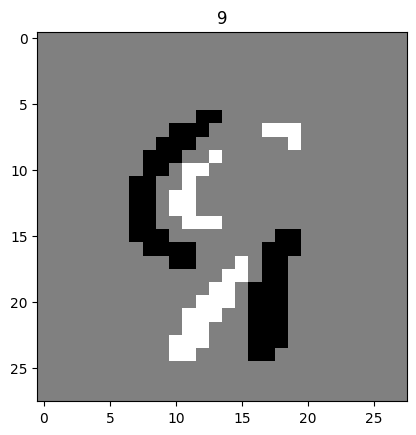

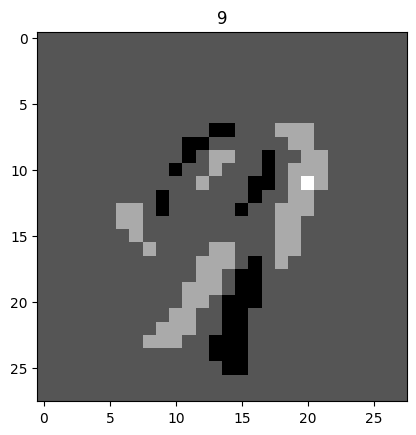

In [85]:
for i in range(1, 10, 4):
    for j in range(3):

        U_t = np.transpose(U[i]) * 15

        primer_columna = U_t[j].tolist()

        matriz = vector_a_matriz(primer_columna)

        grafico_matriz(matriz, i)

c) Las columnas de U_i son combinacion lineal del espacio columna de M_i, y como las columnas de M_i son nuestras imagenes, las imagenes forman las columnas de U_i. Entonces estamos graficando una combinacion lineal de las todas imagenes de aquel digito

d) Observamos que las 3 imagenes "mantienen" el mismo aspecto y que estan centradas. 
Como sabemos que cada columna de U_i es combinacion lineal del las imagenes, entonces tiene sentido que éstas esten centradas y se parezcan al digito. Podemos notar tambien que los pixeles tienen cierto rango similar al imagen promedio de cada digito.

-Explicar las diferencias

#### Inciso E

In [142]:
def prediccion_svd(matrices, k, cantidad_imagenes_testeo):

    r = []

    predicciones = []

    U_p = matrices[:]

    for j in range(cantidad_imagenes_testeo):

        _ , imagen_sin_indice = remover_indice_vector(datos_testeo[j])
        x = np.transpose(np.array(imagen_sin_indice))

        for i in range(10):

            U_p[i] = np.transpose( np.transpose(U_p[i])[:k] )
            proy_sobre_imagen_de_U = U_p[i]@np.transpose(U_p[i])

            r.append( np.linalg.norm( x - proy_sobre_imagen_de_U@x ) )
        
        predicciones.append( r.index(min(r)) )
        r.clear()

    return predicciones

def precision_predicciones_svd(matrices, k, cantidad_imagenes_testeo):

    precision = 0

    desaciertos = []

    aciertos = []

    predicciones = prediccion_svd(matrices, k, cantidad_imagenes_testeo)

    for i in range(len(predicciones)):

        indice_imagen, imagen_sin_indice = remover_indice_vector(datos_testeo[i])

        imagen = vector_a_matriz(imagen_sin_indice)

        if predicciones[i] == indice_imagen:

            precision += 1

            aciertos.append( (imagen, indice_imagen , predicciones[i]) )

        else:

            desaciertos.append( (imagen, indice_imagen , predicciones[i]) )

        
    precision = precision / len(predicciones)

    return precision, desaciertos, aciertos, predicciones

In [89]:
for k in range(1, 6):
    
    precision, _, _ = precision_predicciones_svd(U, k, 200)
    print("Precision k:",k,"=",precision)


Precision k: 1 = 0.77
Precision k: 2 = 0.87
Precision k: 3 = 0.92
Precision k: 4 = 0.945
Precision k: 5 = 0.945


#### Ejercicio 5

K = 3


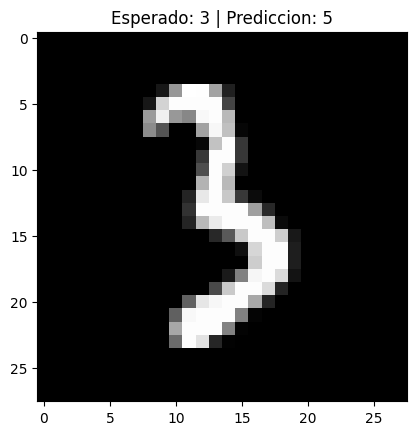

K = 5


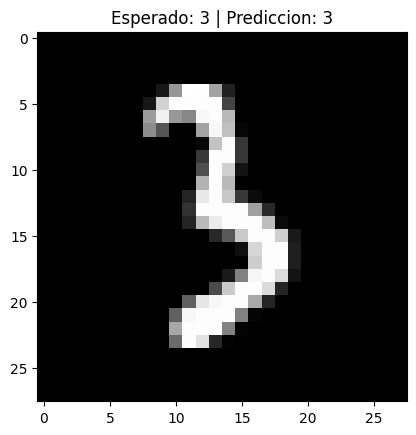

In [150]:
_, desaciertos3, aciertos3, predicciones3  = precision_predicciones_svd(U, 3, 200)
_, desaciertos5, aciertos5, predicciones5  = precision_predicciones_svd(U, 5, 200)

print("K = 3")
indice = desaciertos3[3][1]
prediccion = desaciertos3[3][2]
plt.title("Esperado: {} | Prediccion: {}".format(indice, prediccion))
plt.imshow(desaciertos3[3][0], cmap='gray')
plt.show()

print("K = 5")
indice = aciertos5[39][1]
prediccion = aciertos5[39][2]
plt.title("Esperado: {} | Prediccion: {}".format(indice, prediccion))
plt.imshow(aciertos5[39][0], cmap='gray')
plt.show()

Tanto la precision en el ejercicio 2 utilizando la distancia euclidea con el promedio y la precision en el ejercicio 4 utilizando SVD y un k = 1 son iguales. Esto se puede deber a que como agarramos una sola columna de U y ésta es combinacion lineal de todas las imagenes del digito, y el promedio es una "combinacion lineal" tambien puesto que seria la combinacion lineal de todas las imagenes con coeficientes 1/cantidad_imagenes, entonces estan relacionados. 
En cambio cuando utilizamos mas columnas de U (k >= 1) la precision mejora puesto que al utilizar mas columnas obtenemos mas "informacion" de las imagenes.